In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from libzhifan import epylab
from libzhifan.quick_inspect import quick_inspect
from libzhifan.geometry import SimpleMesh, projection, CameraManager
import numpy as np
import torch

In [3]:
from homan.datasets.arctic_stable import ArcticStable

In [4]:
ds = ArcticStable(2)

/home/skynet/miniconda3/envs/phosa16_env/lib/python3.7/site-packages/manopth/manolayer.py:72: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1595629403081/work/torch/csrc/utils/tensor_numpy.cpp:141.)
  torch.Tensor(smpl_data['betas'].r).unsqueeze(0))


In [5]:
annots = ds[15]
# annots = ds[0]

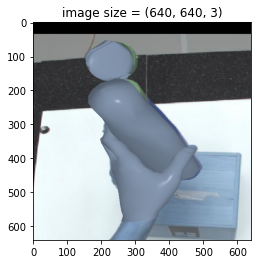

In [33]:
# Pred (using gt)
gt_R_o2e = annots['gt_R_o2e']
gt_t_o2e = annots['gt_t_o2e']

verts_og = annots['objects'][0]['canverts3d']  # inital
verts_pred = torch.matmul(gt_R_o2e, verts_og.permute(0, 2, 1)).permute(0, 2, 1) + gt_t_o2e.view(2, 1, 3)

mobj = SimpleMesh(
    verts=verts_pred[0],
    faces=annots['objects'][0]['faces'][0])
mhand = SimpleMesh(
    verts=annots['hands'][0]['verts3d'][0],
    faces=annots['hands'][0]['faces'][0])

K = annots['camera']['K'][0]
cam_man = CameraManager(K[0, 0], K[1, 1,], K[0, 2], K[1, 2], 640, 640)

img = projection.perspective_projection_by_camera(
    [mhand, mobj], cam_man, method={'name': 'pytorch3d', 'coor_sys':'nr', 'in_ndc': False}, 
    image=np.asarray(annots['images'][0]))

epylab.eimshow(img)

In [31]:
# Gt
mobj = SimpleMesh(
    verts=annots['objects'][0]['verts3d'][0],
    faces=annots['objects'][0]['faces'][0])
mhand = SimpleMesh(
    verts=annots['hands'][0]['verts3d'][0],
    faces=annots['hands'][0]['faces'][0])

K = annots['camera']['K'][0]
cam_man = CameraManager(K[0, 0], K[1, 1,], K[0, 2], K[1, 2], 640, 640)

img = projection.perspective_projection_by_camera(
    [mhand, mobj], cam_man, method={'name': 'pytorch3d', 'coor_sys':'nr', 'in_ndc': False}, 
    image=np.asarray(annots['images'][0]))

epylab.eimshow(img)

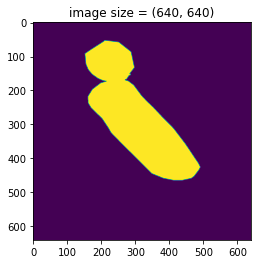

In [32]:
img = projection.perspective_projection_by_camera(
    mobj, cam_man, method={'name': 'nr', 'coor_sys':'nr', 'in_ndc': False}, 
    image=np.asarray(annots['images'][0]))

epylab.eimshow(img[0])

In [13]:
mod = torch.load('results/arctic_stable/step2/samples/s01/ketchup_grab_01_108_187_left/model.pth')

In [29]:
verts_pred, _ = mod.get_verts_object()

sil_loss_dict, sil_metric_dict = mod.losses.compute_sil_loss_object(
    verts=verts_pred, faces=mod.faces_object)

sil_loss_dict

sil_metric_dict

In [33]:
import pandas as pd